In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("final_learning_potential_dataset.csv")
distress_vars = df[["stress_congeneric_score", "depression_congeneric_score", "cog_affect_congeneric"]]
somatic = df[["somatic_congeneric"]]

In [3]:
scaler = StandardScaler()
distress_scaled = scaler.fit_transform(distress_vars) 

In [4]:
pca = PCA(n_components=1)
latent_distress = pca.fit_transform(distress_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Loadings:", pca.components_)

Explained Variance Ratio: [0.86723446]
Loadings: [[0.53710311 0.59760796 0.59530241]]


## Amaç
 Stres, depresyon ve bilişsel duygusal belirtileri temsil eden alt ölçeklerin ortak varyansını açıklayan tek bir latent "distress" faktörü elde etmek amacıyla Temel Bileşen Analizi (PCA) uygulanmıştır. 

## Yöntem 
 - PCA, n_components=1 olacak şekilde yürütülmüştür. 
 - Analiz öndesi değişkenler, StandardScale ile standartlaştırılmıştır. 

## Bulgular 
 PCA ÖLÇÜTÜ                      |  DEĞER 
 Açıklanan Varyans Oranı (EVR)   |  0.867
 Bileşen Yükleri                 |  0.537, 0.597, 0.595

## Yorum 
 - Tek bileşen, distress alt ölçeklerindeki ortak varyansın %86.7'sini açıkalamaktadır. 
 - Üç değişken de bileşene çok yakın boyutlarda yüklenmiştir. 
 - Bileşen yüklerinin dengesi, latent yapının tek boyutlu ve tutarlı olduğunu göstermektedir. 
 - Bu sonuç, distress yapısının ölçülen tüm alt boyutlarda ortak bir faktör tarafından temsil
 edildiğini desteklemektedir. 


In [6]:
model = LinearRegression()
model.fit(latent_distress, somatic)

print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])
print("R2:", model.score(latent_distress, somatic))

Coefficient: 0.5695732509267056
Intercept: 1.6305762884810135e-16
R2: 0.7129260254107941


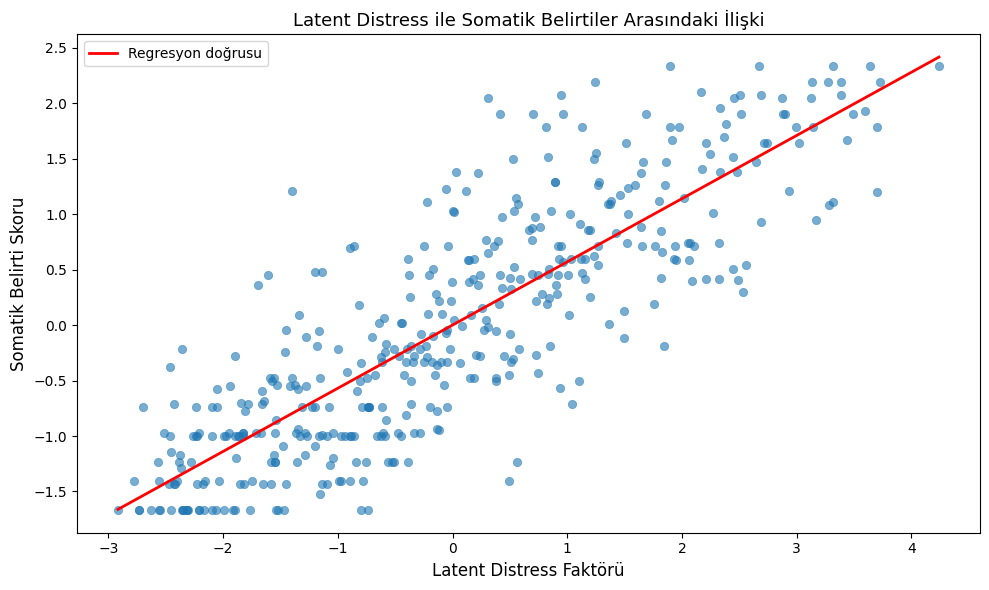

In [7]:

x_vals = np.linspace(latent_distress.min(), latent_distress.max(), 200).reshape(-1, 1)
y_vals = model.predict(x_vals)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=latent_distress.flatten(),
                y=somatic.values.flatten(),
                alpha=0.6,
                edgecolor=None)

plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Regresyon doğrusu')


plt.xlabel("Latent Distress Faktörü", fontsize=12)
plt.ylabel("Somatik Belirti Skoru", fontsize=12)
plt.title("Latent Distress ile Somatik Belirtiler Arasındaki İlişki", fontsize=13)

plt.legend()
plt.tight_layout()
plt.show()


## Latent Distress Faktörü İle Somatik Belirtiler Arası İlişki 
 Bu bölümde; stre, depresyon ve bilişsel duygusal belirtilerin ortak varyansını temsil eden latent distress faktörü ile somatik belirti skoru arasındaki ilişki analiz edilmiştir. Elde edilen latent distress skoru ile somatik belirti skoru arasında doğrusal regresyon uygulanmıştır.

## Bulgular 
 - Regresyon katsayısı 0.57, latent distress düzeyindeki bir birimlik artışın somatik belirtilerde anlamlı ve pozitif bir artışla ilişkili olduğunu göstermektedir.
 - Modelin açıklayıcılık gücü R² = 0.71 olup somatik belirti varyansının yaklaşık %71’inin latent distress tarafından açıklandığı görülmektedir.
 - Scatter grafiği ve regresyon doğrusu, değişkenler arasındaki lineer ilişkinin güçlü ve tutarlı olduğunu görsel olarak desteklemektedir.

## Yorum 
  Bu sonuçlar, stres, depresyon ve bilişsel-duygusal belirtilerin ortak bir psikolojik çekirdeği temsil ettiğini ve bu çekirdeğin somatik belirtiler üzerinde belirgin bir etkisi bulunduğunu göstermektedir. Latent faktör kullanımı, multicollinearity sorununu ortadan kaldırmış; yorumlanabilir, psikometrik açıdan tutarlı ve daha genel bir yapı ortaya koymuştur.